# Project to make the best candy

Here we have some data showing us the most popular candy. The study involved taking a survey of about 269,000 randomly generated matchups, pitting each candy against one another, 1-on-1. This proposal is to take the best elements of each candy archetype and use that information and putting out even better candy.

Most candy comes in two different types, those being a singular bar or unit such as a chocolate bar or something defined by this data as a pluribus -- one of many candies in a box or bag. The plan is to formulate two types of new candy and put out a survey, similar to 

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import math
import seaborn as sns
import re
%matplotlib inline

In [3]:
data = pd.read_csv('candy-data.csv')
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [4]:
data['competitorname'] = data['competitorname'].apply(lambda x: x.replace('Õ',"'"))

In [5]:
data = data.sort_values('winpercent', ascending = False).reset_index(drop=True)
data

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
1,Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
2,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
3,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
4,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
5,Reese's pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
6,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
7,Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
8,Peanut butter M&M's,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
9,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641


In [44]:
candy_bar = data[data.bar==1].reset_index(drop=True)
candy_bar_mean = candy_bar.head().mean()
len(candy_bar)

21

In [45]:
pluribus = data[data.pluribus==1].sort_values(by='winpercent').reset_index(drop=True)
pluribus_mean = pluribus.head(10).mean()
len(pluribus)

44

In [46]:
not_bar = data[data.bar==0]
neither = not_bar[not_bar.pluribus==0].reset_index(drop=True)
neither_mean = neither.head().mean()
len(neither)

20

In [37]:
means = pd.DataFrame({'candy_bar_mean':candy_bar_mean, 'pluribus_mean':pluribus_mean, 'neither_mean':neither_mean})
means

,candy_bar_mean,pluribus_mean,neither_mean
chocolate,1.000000,0.100000,0.600000
fruity,0.000000,0.500000,0.400000
caramel,0.600000,0.100000,0.000000
peanutyalmondy,0.400000,0.100000,0.600000
nougat,0.400000,0.000000,0.000000
crispedricewafer,0.400000,0.000000,0.000000
hard,0.000000,0.300000,0.000000
bar,1.000000,0.000000,0.000000
pluribus,0.000000,1.000000,0.000000
sugarpercent,0.522600,0.433200,0.583000


### The top performing flavors
By taking the top 25% of each of these groups, then averaging them out, we can find the most important factors of each group and focus in on those traits. As seen here, by far the most well performing flavor included in these is chocolate, included in the majority of each candy. Another noteable trait is those with nuts, appearing is most of these as well. The amount of sugar stays just about the same across the board.

Another trend we see here is the prices of each item is the highest when considering bars of candy as opposed to the other two archetypes. Also, price for each of the candies trended downward the further they were down the list. But what can be said about some relationships for the price and win ratio with specific traits is another important factor to look at.

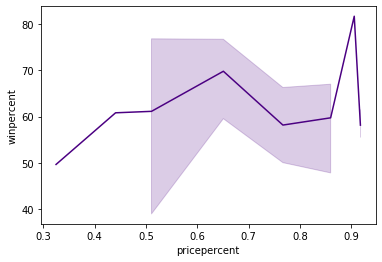

In [38]:
sns.lineplot(x='pricepercent',y="winpercent",data=candy_bar,color="indigo")

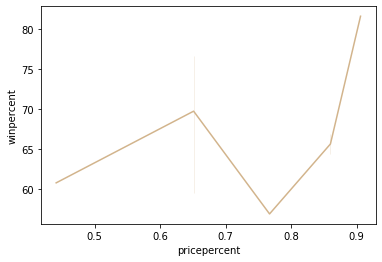

In [50]:
sns.lineplot(x='pricepercent',y="winpercent",data=candy_bar[candy_bar.caramel==1],color="tan")

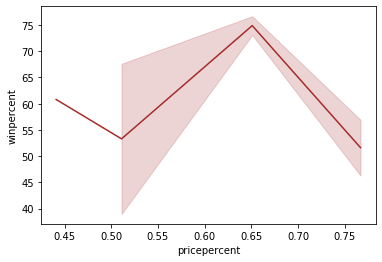

In [40]:
sns.lineplot(x='pricepercent',y="winpercent",data=candy_bar[candy_bar.nougat==1],color="brown",)

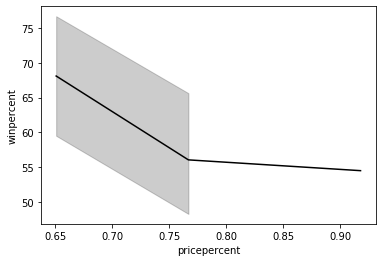

In [41]:
sns.lineplot(x='pricepercent',y="winpercent",data=candy_bar[candy_bar.peanutyalmondy==1],color="black",)

The general price to win ratio of all the top candy bars does have a relationship. The higher the win ratio, the more expensive the candy, which probably means higher quality in the candy itself. Caramel as well has a fairly steady relationship in that same vein, which leads us to believe that chocolate and caramel are very important in the higher end candy. Another notable piece of information is that peanuts and almonds in the candy bar generally had higher win ratios when they were included in more inexpensive kinds of candy bars. 

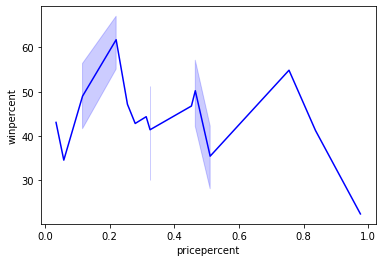

In [51]:
sns.lineplot(x='pricepercent',y="winpercent",data=pluribus[pluribus.fruity==1],color="blue")

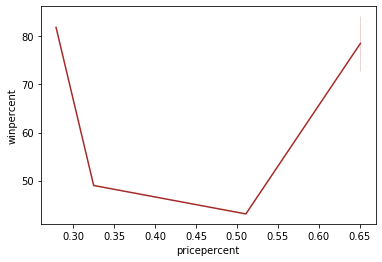

In [59]:
sns.lineplot(x='pricepercent',y="winpercent",data=neither[neither.chocolate==1],color="brown",)

The pluribus category had only one notable trait in its top winners, that being the fruity category. What we see is a bit of a decline in win percent the higher the price point goes. When the price is in about the 20th percentile, the winrate is at its highest point. We also run into to something a bit similar when looking at the "neither" category below.

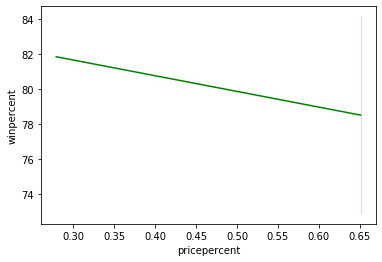

In [56]:
sns.lineplot(x='pricepercent',y="winpercent",data=neither[neither.peanutyalmondy==1],color="green")

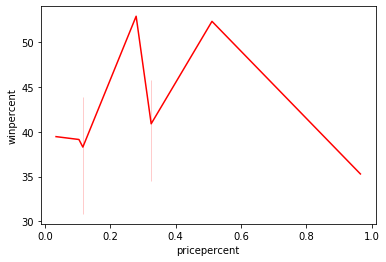

In [54]:
sns.lineplot(x='pricepercent',y="winpercent",data=neither[neither.fruity==1],color="red")

As seen here, the neither category has three main traits included in most of the top performers, both of which still see a winrate decrease as the price gets higher. This is a bit opposite of the top performing candy bars, where the higher the price, the higher their winrate appeared to be. 

# The proposal

The data provided to us shows a few specific aspects that fit a cetain trend. First of all, chocolate and caramel have the top of the candy bar rates of the higher priced candy. Both the "pluribus" and "neither" categories had candy that performed well the more inexpensive they were. Anything at a higher price point didn't do well regardless of the trait it had. So it can be assumed that if we are to put out a candy bar on the market, we should include chocolate and caramel, and perhaps a third trait could be a crisp wafer, place it at a slightly lower price point than what is already on the market and see how it does. We can do the same idea with a pluribus type of candy. But instead it might be interesting to put more emphasis on chocolate, which did well at the highest price point, and combine that with fruity type candies, which did well at lower price points, but not at the highest. Chocolate and some kind of jam or similar comes to mind. We can use these two types of candies and compare them with how the candies of the same category did and see if this resulted in any improvement from previous performance of the candies adn the same price points with the same traits.

First, we can run tests on candies of very similar likeness, presenting two types of candy to some randomly selected volunteers. They would not know what candy is which and just eats them completely blind in a random order. Then they decide whether or not which candy they prefer.

Second, we can start pushing tests out with multiple types of candy. Volunteers will still remain blind during the process and still decide which candy they prefer. We can compare the two of these different sets of data to see where the candies performed and ranked. We can repeat this test as much as we want for whatever kinds of traits we want until we get the desired results.